In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('train.csv')


df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Get a summary of data
print("--- Data Info ---")
df.info()

print("\n--- Missing Values ---")
# count of missing values in each column
print(df.isnull().sum())

# --- Feature Engineering ---

# 1. Create the 'Title' feature from the 'Name' column
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# 2. Create the 'FamilySize' feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# 3. Create a simple 'IsAlone' feature
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1


print("\n--- DataFrame with New Features ---")
df.head()


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

--- Missing Values ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin       

<>:12: SyntaxWarning: invalid escape sequence '\.'
<>:12: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-2557689506.py:12: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1


/tmp/ipython-input-4031656779.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Title', y='Survived', data=df, ci=None)


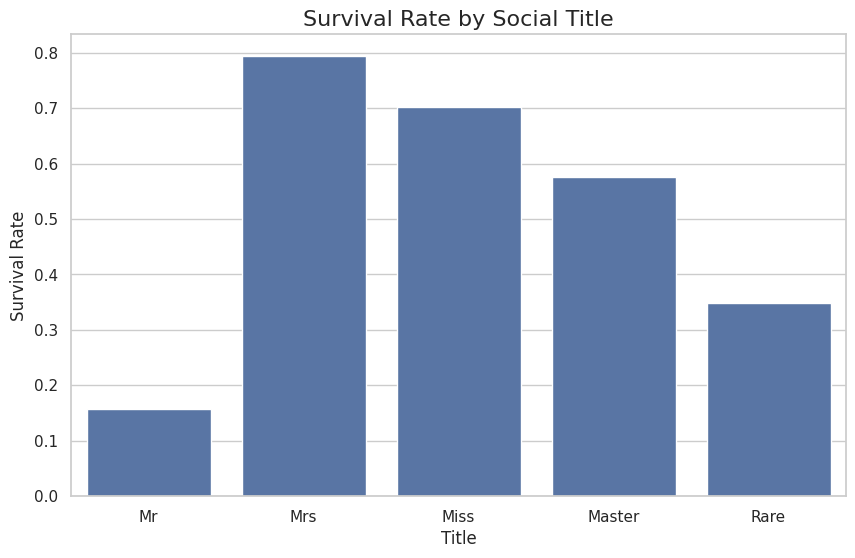

In [3]:
# Set the plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Title', y='Survived', data=df, ci=None)

# Add titles and labels for clarity
plt.title('Survival Rate by Social Title', fontsize=16)
plt.ylabel('Survival Rate', fontsize=12)
plt.xlabel('Title', fontsize=12)
plt.show()

/tmp/ipython-input-1198110869.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=df, ci=None)


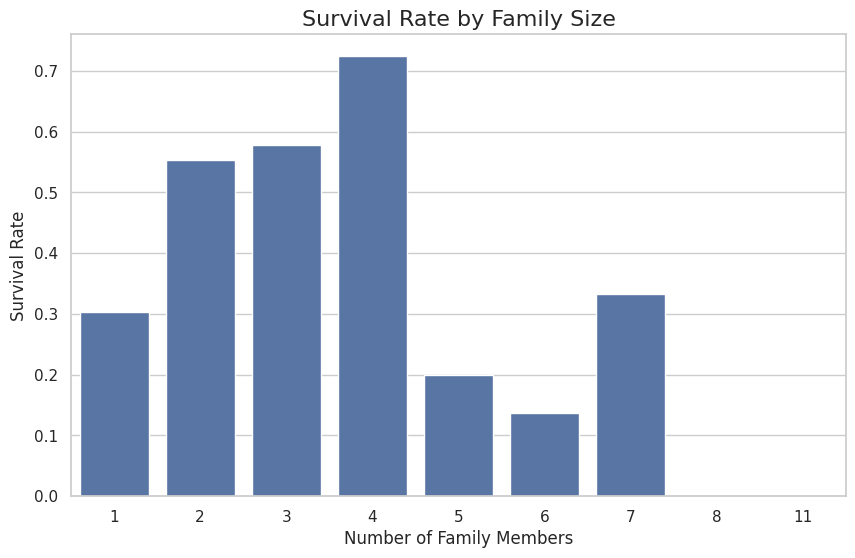

In [4]:
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Family Size', fontsize=16)
plt.ylabel('Survival Rate')
plt.xlabel('Number of Family Members')
plt.show()

In [5]:
# --- Handle Missing Values ---

# 1. Fill missing 'Age' values intelligently
# We'll use the median age for each 'Title' (e.g., the median 'Master' is a child)
# This is much more accurate than using the overall median age.
df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

# 2. Fill the two missing 'Embarked' values with the most common port
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


# --- Convert Categorical Features to Numbers ---

# 1. Convert 'Sex' to 0 and 1
df['Sex'] = df['Sex'].map({'female': 1, 'male': 0}).astype(int)

# 2. Convert 'Title' to numbers
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df['Title'] = df['Title'].map(title_mapping)

# 3. Convert 'Embarked' to numbers
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)


# --- Final Cleanup ---

# Drop columns that are no longer useful for the model
df = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId', 'SibSp', 'Parch'], axis=1)


# --- Final Check ---
print("--- Cleaned & Finalized DataFrame ---")
df.head()

print("\n--- Final Data Info ---")
df.info()

--- Cleaned & Finalized DataFrame ---

--- Final Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    891 non-null    int64  
 6   Title       891 non-null    int64  
 7   FamilySize  891 non-null    int64  
 8   IsAlone     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


Model Accuracy: 86.03%

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       105
           1       0.84      0.82      0.83        74

    accuracy                           0.86       179
   macro avg       0.86      0.86      0.86       179
weighted avg       0.86      0.86      0.86       179


--- Confusion Matrix ---


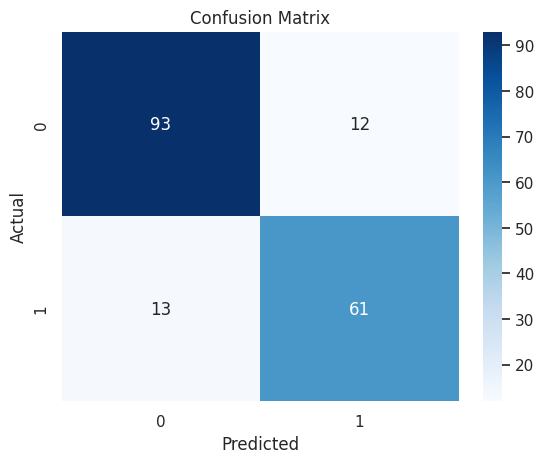


--- Feature Importances ---


/tmp/ipython-input-1235643197.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importances, palette='viridis')


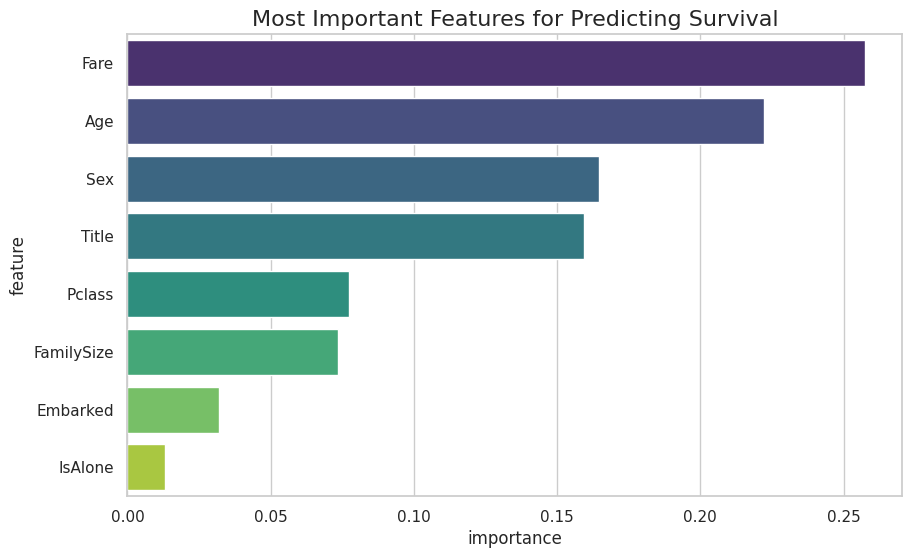

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Define features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Build and train the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Make predictions on the test data
predictions = model.predict(X_test)

# --- Evaluate the Model ---

# 5. Check the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy:.2%}\n") # Formats the output as a percentage

# 6. View a detailed classification report
print("--- Classification Report ---")
print(classification_report(y_test, predictions))

# 7. Visualize the confusion matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# --- Interpret the Results ---

# 8. Plot the feature importances to see what the model valued most
print("\n--- Feature Importances ---")
importances = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_})
importances = importances.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importances, palette='viridis')
plt.title('Most Important Features for Predicting Survival', fontsize=16)
plt.show()

In [7]:
from sklearn.model_selection import GridSearchCV



# Define the model
model = RandomForestClassifier(random_state=42)

# Define the grid of hyperparameters to search over
# These are settings for the RandomForest model we can tweak.
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees in the forest
    'max_depth': [5, 10, 15],             # Maximum depth of the tree
    'min_samples_leaf': [1, 2, 4]         # Minimum number of samples required at a leaf node
}

# Set up the grid search with 5-fold cross-validation
# n_jobs=-1 uses all available CPU cores to speed up the process.
# verbose=2 will print progress updates so you can see it working.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# grid search on the training data
grid_search.fit(X_train, y_train)

# best parameters found by the search
print("\nBest parameters found: ", grid_search.best_params_)

# best cross-validated score
print(f"Best cross-validated accuracy: {grid_search.best_score_:.2%}")

# --- Evaluate the FINAL Tuned Model ---

# 7. Best model found to make predictions on our test set
best_model = grid_search.best_estimator_
final_predictions = best_model.predict(X_test)

# 8. Final accuracy and classification report
final_accuracy = accuracy_score(y_test, final_predictions)
print(f"\nFinal accuracy on test set: {final_accuracy:.2%}")

print("\n--- Final Classification Report ---")
print(classification_report(y_test, final_predictions))

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters found:  {'max_depth': 5, 'min_samples_leaf': 4, 'n_estimators': 100}
Best cross-validated accuracy: 83.14%

Final accuracy on test set: 82.68%

--- Final Classification Report ---
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179





## Final Results: Why a Lower Score Can Be Better

In this project, we built two different models to predict who would survive the Titanic.

Our first model was simple. It got a high accuracy score of **86.03%**. This looks great, but because we only tested it on one specific group of passengers, this high score might have just been a lucky break.

For our second model, we used a much smarter method. We had the computer test many different settings for the model. For each setting, it ran the test 5 times on different groups of passengers to get a fair average score. This helped us find the best possible version of our model.

This new, smarter model scored **82.68%**. Even though this number is lower, it's a much more **honest and trustworthy** score.

**Why is the lower score better?** The first model likely scored so high because it "memorized" the answers for its one test, but didn't truly learn the patterns. The second model was forced to prove it could get good scores on 5 different tests, so its 82.68% accuracy is a more realistic picture of how it will perform on new data in the future.

**Conclusion:** The second model is the clear winner. We can be much more confident that it will actually work well in the real world. It's better to have a trustworthy model with a realistic score than a "lucky" one with a score that's probably too good to be true.



